In [1]:
print("Hello World")

Hello World


# Basic Linear Regression Model

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.<br>
Here in this notebook we are going to predict the prices of house based on the data we have.

Now this particular project can have its scope in Data Science as well as in Machine leanring too.

https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

### 1. Importing necessary libraries:

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15, 10)

In [5]:
df = pd.read_csv("house_data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

Aggregating no. of flats by some specific parameter:

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [9]:
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

### 2. Data Preprocessing & Cleaning:

Assuming the area_type, availibilty, society and balcony are not significant enough so discarding them.

In [6]:
df_revised = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')

In [7]:
df_revised

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


Let's see how many null values we have in our dataset

In [8]:
df_revised.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Now we have nearly 13000 rows so its okay to remove these rows which have a null value. Otherwise we would have taken median value and insert it in that null place.

In [9]:
df_without_null = df_revised.dropna()
df_without_null.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Now as we can see there are no null values present in our data. Woohhooo!

In [11]:
df_without_null.shape

(13246, 5)

In [12]:
df_without_null

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


Size column have some data redundancy. So we have to remove that also.

In [13]:
df_without_null['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

This column have 3 BHK also and 3 bedroom also which seems conflicting. So we will take only the first number and store it in new column called flat_size.

In [15]:
df_without_null['flat_size'] = df_without_null['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Bhushan\AppData\Local\Temp\ipykernel_13280\632050234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_null['flat_size'] = df_without_null['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df_without_null

,location,size,total_sqft,bath,price,flat_size
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


Dropping the redundant size column

In [17]:
df_without_null.drop(['size'], axis='columns')

,location,total_sqft,bath,price,flat_size
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [18]:
df_without_null[df_without_null.flat_size>5]

,location,size,total_sqft,bath,price,flat_size
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.0,6
45,HSR Layout,8 Bedroom,600,9.0,200.0,8
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6
64,Bommanahalli,8 Bedroom,3000,8.0,140.0,8
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8
...,...,...,...,...,...,...
13221,T Dasarahalli,9 Bedroom,1178,9.0,75.0,9
13226,Raja Rajeshwari Nagar,8 Bedroom,6000,8.0,215.0,8
13277,Kundalahalli Colony,7 Bedroom,1400,7.0,218.0,7
13279,Vishwanatha Nagenahalli,6 Bedroom,1200,5.0,130.0,6


In [19]:
df_without_null[df_without_null.flat_size>6]

,location,size,total_sqft,bath,price,flat_size
45,HSR Layout,8 Bedroom,600,9.0,200.0,8
64,Bommanahalli,8 Bedroom,3000,8.0,140.0,8
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8
129,Vishwapriya Layout,7 Bedroom,950,7.0,115.0,7
140,Hennur Road,8 Bedroom,5000,8.0,250.0,8
...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590,9.0,132.0,7
13221,T Dasarahalli,9 Bedroom,1178,9.0,75.0,9
13226,Raja Rajeshwari Nagar,8 Bedroom,6000,8.0,215.0,8
13277,Kundalahalli Colony,7 Bedroom,1400,7.0,218.0,7


Ohh the size column haven't dropped yet!

In [20]:
df_without_size = df_without_null.drop(['size'], axis='columns')

In [21]:
df_without_size

,location,total_sqft,bath,price,flat_size
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


Let us write down the data frames we have created till now:<br>
df -> Original dataframe in which we loaded our csv file<br>
df_revised -> Dropped 'area_type', 'availability', 'society', 'balcony'<br>
df_without_null -> Removed all null values<br>
df_without_size -> Dropped redundant size column and values of that column stored into new column named 'flat_size'

We have to now clean sqft_total column

In [22]:
df_without_size.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here there are some values which are in range so we have to take average of that both values before proceeding further. First we will check whether the given number is a float or not.

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df_without_size[df_without_size['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,flat_size
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


Some values are in range so we have to calculate average of them.

In [30]:
def average_of_range(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except: 
        return None

In [32]:
average_of_range('2819')

2819.0

In [33]:
average_of_range('2010-2020')

2015.0

In [35]:
df_sqft_normalised = df_without_size.copy()
df_sqft_normalised['total_sqft'] = df_sqft_normalised['total_sqft'].apply(average_of_range)

In [36]:
df_sqft_normalised

,location,total_sqft,bath,price,flat_size
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [38]:
df_without_size.loc[30]

location        Yelahanka
total_sqft    2100 - 2850
bath                  4.0
price               186.0
flat_size               4
Name: 30, dtype: object

In [37]:
df_sqft_normalised.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
flat_size             4
Name: 30, dtype: object

Now we can see the difference between the sqft_total values of these same data.

Now we have to create a new column called 'price_per_sqft' which will be our important parameter.

In [39]:
df_including_price_per_sqft = df_sqft_normalised.copy()
df_including_price_per_sqft['price_per_sqft'] = df_including_price_per_sqft['price']*100000 / df_including_price_per_sqft['total_sqft']

In [40]:
df_including_price_per_sqft

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


Identifying unique locations now

In [42]:
df_including_price_per_sqft.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [43]:
len(df_including_price_per_sqft.location.unique())

1304

#### Dimensionality Curse problem:

We have too many locations here which will be going to create a problem. This problem is known as dimensionality curse. High dimensionality problem.

In [47]:
df_including_price_per_sqft.location = df_including_price_per_sqft.location.apply(lambda x: x.strip())

location_stats = df_including_price_per_sqft.groupby('location')['location'].agg('count').sort_values()
location_stats

location
1 Annasandrapalya      1
Kudlu Village,         1
Kumbhena Agrahara      1
Kuvempu Layout         1
LIC Colony             1
                    ... 
Thanisandra          236
Kanakpura Road       266
Electronic City      304
Sarjapur  Road       392
Whitefield           535
Name: location, Length: 1293, dtype: int64

In [48]:
len(location_stats[location_stats <= 10])

1052

In [50]:
location_stats_less_than_ten = location_stats[location_stats <= 10]
location_stats_less_than_ten

location
1 Annasandrapalya       1
Kudlu Village,          1
Kumbhena Agrahara       1
Kuvempu Layout          1
LIC Colony              1
                       ..
Kalkere                10
Naganathapura          10
Sector 1 HSR Layout    10
Basapura               10
BTM 1st Stage          10
Name: location, Length: 1052, dtype: int64

In [51]:
len(df_including_price_per_sqft.location.unique())

1293

In [53]:
df_including_price_per_sqft.location = df_including_price_per_sqft.location.apply(lambda x: 'other' if x in location_stats_less_than_ten else x)

In [54]:
len(df_including_price_per_sqft.location.unique())

242

#### Solution to dimensionality curse:

In [55]:
df_including_price_per_sqft

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


Previously our unique locations were 1293 but now it is 242. Every location which has less than 10 data points (instances) are classified as 'other'. And rest of the locations are as it is.

Let us write down the data frames we have created till now:<br>
df -> Original dataframe in which we loaded our csv file<br>
df_revised -> Dropped 'area_type', 'availability', 'society', 'balcony'<br>
df_without_null -> Removed all null values<br>
df_without_size -> Dropped redundant size column and values of that column stored into new column named 'flat_size'<br>
df_sqft_normalised -> Normalised total_sqft column removed the ranges<br>
df_including_price_per_sqft -> Inserted a new column in which the value per sqft is mentioned.

### 3. Outlier Detection:

Outliers are some values which are not normal or very diversifying. These values are still acceptable but it tends to ceate some anomaly in the model.

In [56]:
df_including_price_per_sqft.head(10)

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


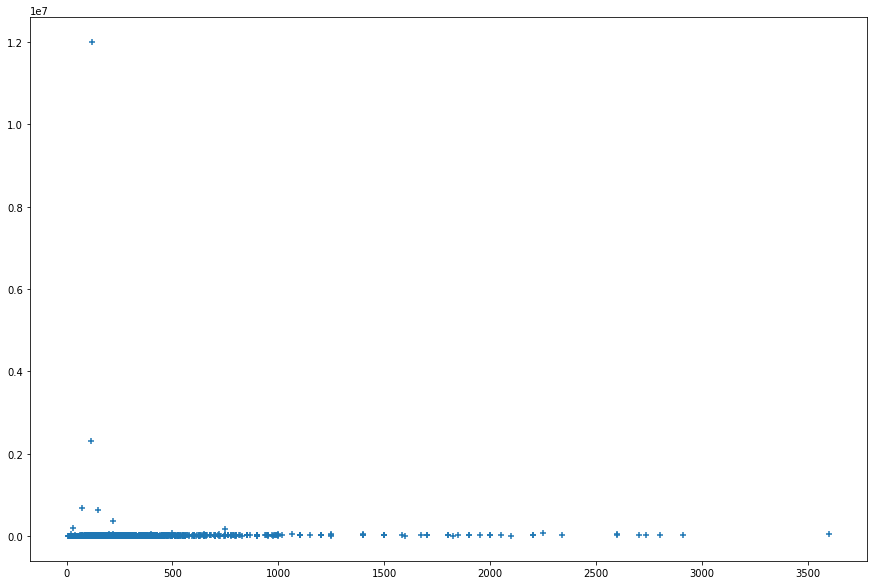

In [62]:
x= df_including_price_per_sqft.price
y = df_including_price_per_sqft.price_per_sqft
plt.scatter(x,y, marker = '+')
plt.show()

Assuming that one room has size equal to 300 sqft. So in any type of flat whether be it 1BHK or 2BHK, area per room must be equal to or grater thn 300 sqft.

#### Anomaly 1: Room area per flat must not be less than 300 sqft.

In [63]:
df_including_price_per_sqft[(df_including_price_per_sqft.total_sqft/df_including_price_per_sqft.flat_size) < 300]

,location,total_sqft,bath,price,flat_size,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


Now these 744 houses are those houses which have area per room less than 300 sqft which seems to be inappropriate. So we will have to remove this data.

In [64]:
df_including_price_per_sqft.shape

(13246, 6)

To remove those rows we will negate it.

In [66]:
df_cleaned_1 = df_including_price_per_sqft[~((df_including_price_per_sqft.total_sqft/df_including_price_per_sqft.flat_size) < 300)]

In [67]:
df_cleaned_1

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


Now this data does not posses Anomaly 1.

In [70]:
df_cleaned_1.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Anomaly 2: As from description minimum pps is 267 Rs. which is highly unlikely also max pps is 176,470 Rs. which is only possible if the property is in some prime location. So to genralize the model we will find standard deviation assuming our data is normally distributed.

In [74]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df_cleaned_1.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std_dev = np.std(subdf.price_per_sqft)
        df_reduced = subdf[(subdf.price_per_sqft > (mean-std_dev)) & (subdf.price_per_sqft <= (mean+std_dev))]
        df_out = pd.concat([df_out, df_reduced], ignore_index=True)
    return df_out

In [75]:
df_cleaned_2 = remove_pps_outliers(df_cleaned_1)

In [76]:
df_cleaned_2

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10236,other,1353.0,2.0,110.00,2,8130.081301
10237,other,812.0,1.0,26.00,1,3201.970443
10238,other,1440.0,2.0,63.93,3,4439.583333
10239,other,1075.0,2.0,48.00,2,4465.116279


Now this data is free from Anomaly 2!!

#### Anomaly 3: It is very obvious that within the same location the price of one 1BHK flat cannot be higher than one 2BHK flat. But in our data there are some cases who have same locality but still 1BHK costs more than 2BHK. We will use scatter plot here to demonstrate.

For 2BHK and 3BHK:

In [93]:
# we will now create a function which will take dataframe and location as an input and will plot a scatter plot based on the prices and flat type available there

def plot_scatter_chart (df, location):
    bhk_2 = df[(df.location == location) & (df.flat_size == 2)]
    bhk_3 = df[(df.location == location) & (df.flat_size == 3)]
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color='red', label='2 BHK', s =50, marker = '+')
    plt.scatter(bhk_3.total_sqft, bhk_3.price, color='blue', label='3 BHK', s =50)
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.xlabel("Total area per sqft")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

In [80]:
df_cleaned_2['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

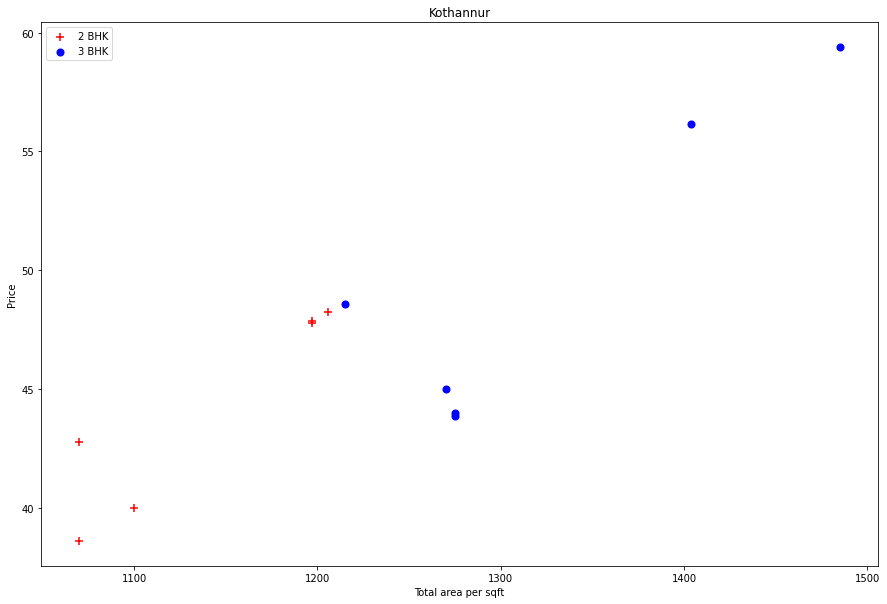

In [94]:
plot_scatter_chart(df_cleaned_2, 'Kothannur')

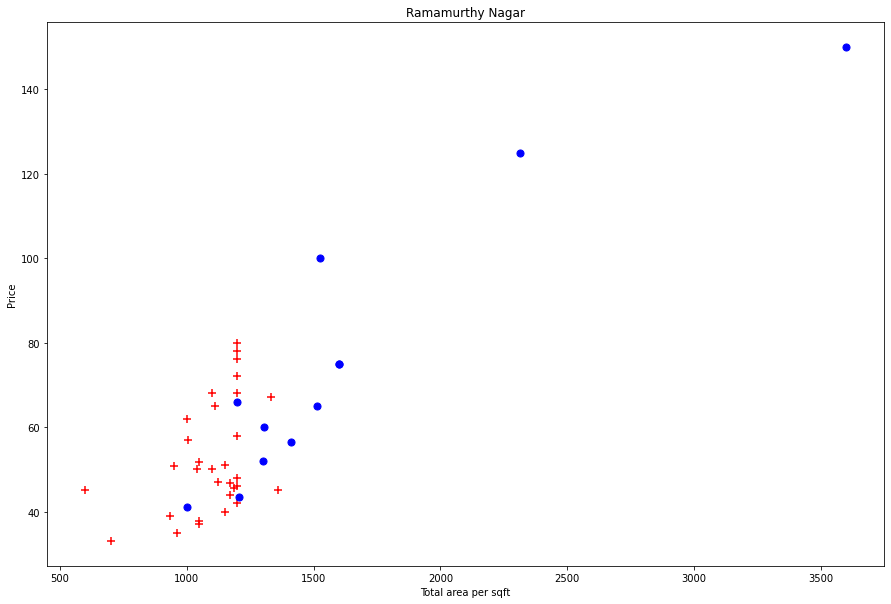

In [92]:
plot_scatter_chart(df_cleaned_2, 'Ramamurthy Nagar')

In [87]:
plt.scatter??

Red marker shows 2BHK flats while blue marker shows 3BHK flats in the given locality. Now we can see at some places the red marker is above blue so this is what we want to remove as an anomaly.

In [101]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('flat_size'):
            bhk_stats[bhk] ={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('flat_size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
    

In [102]:
df_cleaned_3 = remove_bhk_outliers(df_cleaned_2)

In [103]:
df_cleaned_3.shape

(7329, 6)

In [104]:
df_cleaned_3

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301
10237,other,812.0,1.0,26.0,1,3201.970443


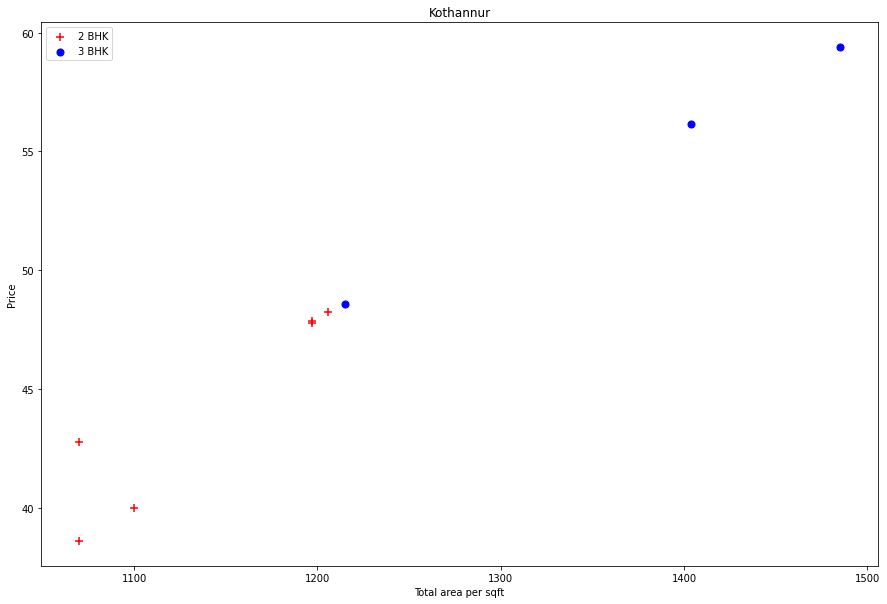

In [107]:
plot_scatter_chart(df_cleaned_3, 'Kothannur')

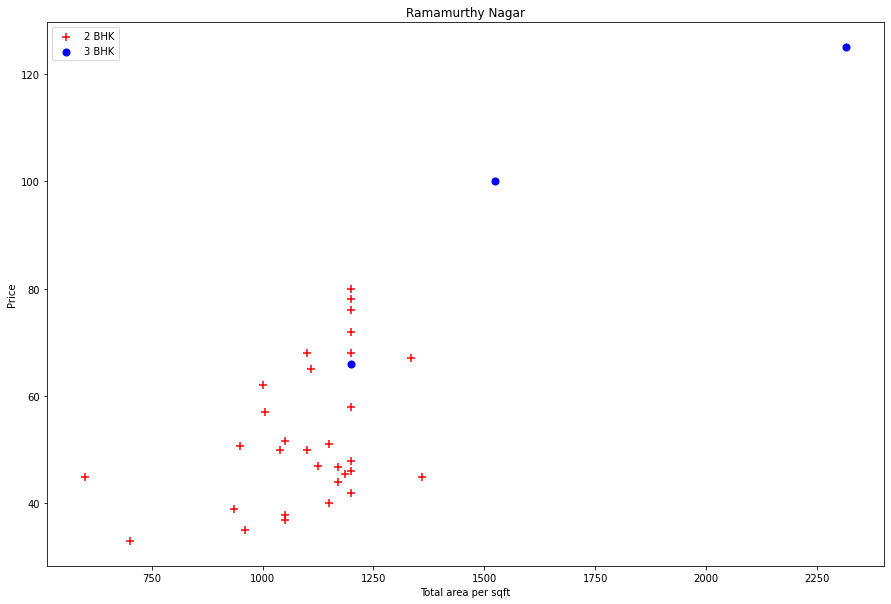

In [106]:
plot_scatter_chart(df_cleaned_3, 'Ramamurthy Nagar')

As we can see the anomaly is getting reduced quite significantly but it can not be eradicated totally.

Now plotting histogram of price per sqft and its count

Text(0, 0.5, 'Count')

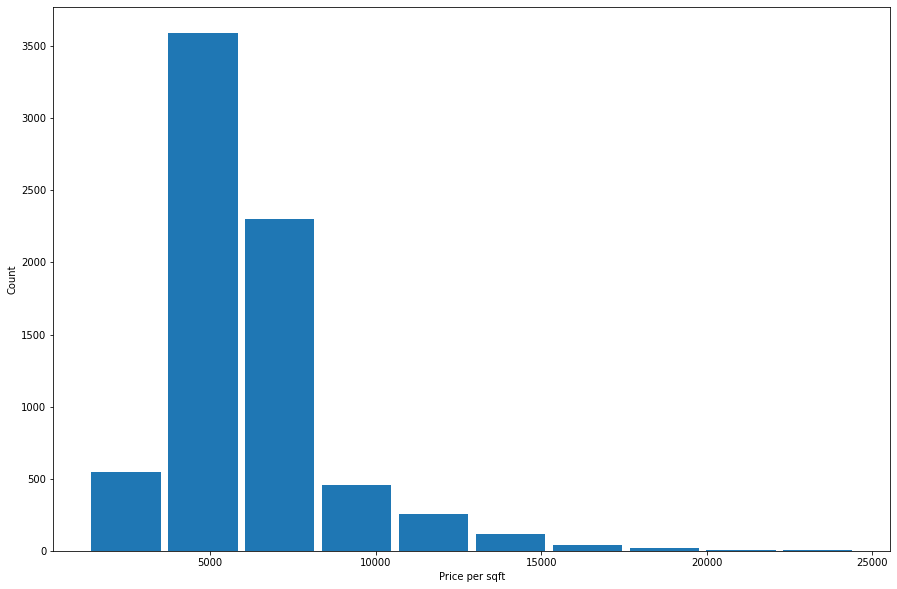

In [110]:
plt.hist(df_cleaned_3.price_per_sqft, rwidth = 0.9)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

We have now resolved the anomaly no. 3

#### Anomaly 4: No. of bathrooms. Now in 3BHK flat there can't be 4 bathrooms. So we have to remove such kind of illogical data or false data.

In [111]:
df_cleaned_3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [112]:
df_cleaned_3[df_cleaned_3.bath < 5]

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10230,other,1155.0,2.0,64.0,2,5541.125541
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301


Text(0, 0.5, 'Count')

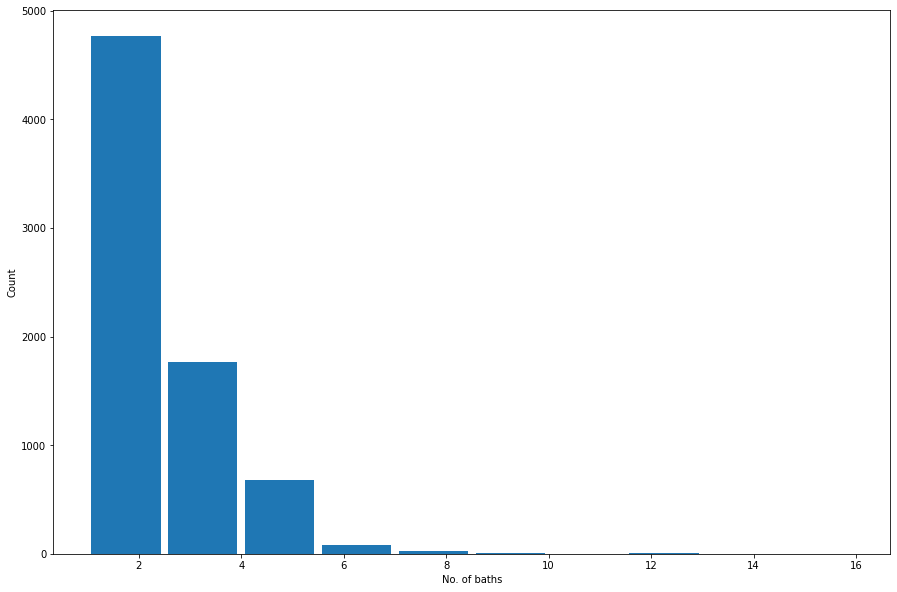

In [113]:
plt.hist(df_cleaned_3.bath, rwidth= 0.9)
plt.xlabel('No. of baths')
plt.ylabel('Count')

In [120]:
df_cleaned_4 = df_cleaned_3[~(df_cleaned_3.bath > df_cleaned_3.flat_size + 2)]

In [121]:
df_cleaned_4

,location,total_sqft,bath,price,flat_size,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,5833.333333
10233,other,1800.0,1.0,200.0,1,11111.111111
10236,other,1353.0,2.0,110.0,2,8130.081301
10237,other,812.0,1.0,26.0,1,3201.970443


Now anomaly 4 has also been resolved!

In [122]:
df_for_model = df_cleaned_4.drop(['price_per_sqft'], axis='columns')

In [123]:
df_for_model

,location,total_sqft,bath,price,flat_size
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


df_for_model is the final dataframe tha we need to use in our Linear Regression Model.

### 4. Creating LinearRegression Model:

#### One Hot Encoding: 
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [124]:
pd.get_dummies(df_for_model.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
# storing dummies in new df and then appending it to df_for_model

dummies_for_model = pd.get_dummies(df_for_model.location)
df_for_model_2 = pd.concat([df_for_model, dummies_for_model.drop('other', axis='columns')], axis='columns')

#### Dummy Variable trap:
The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

In [129]:
df_for_model_2

,location,total_sqft,bath,price,flat_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df_for_model_3 = df_for_model_2.drop('location', axis="columns")
df_for_model_3

,total_sqft,bath,price,flat_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df_for_model_3.shape

(7325, 245)

In [133]:
# creating independent variable df
x = df_for_model_3.drop('price', axis ="columns")
x

,total_sqft,bath,flat_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
y = df_for_model_3.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7325, dtype: float64

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [140]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8017674308564234

#### K-fold Cross Validation:
Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [141]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x ,y, cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

### 5. Comparative Study of various other models:

In [142]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x, y)

C:\Om\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Om\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': True}
1,lasso,0.684336,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.756038,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Further studies:<br>
<a href="https://www.kaggle.com/code/emrearslan123/house-price-prediction">Advanced Regression techniques</a>